# TD: Bootstrap Confidence Intervals for a Regression Coefficient

We want to study the variability of the slope $\beta_1$ in the linear regression model:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i.
$$

We will compare two bootstrap confidence intervals:
- **Normal-approximation CI**
- **Percentile CI**

---

## Step 1. Data and OLS formulas

We consider the following dataset:

| x  | -2 | -1 | 0  | 1  | 2  | 3  | 4  | 8  |
|----|----|----|----|----|----|----|----|----|
| y  | -3.2 | -1.7 | 1.1 | 2.9 | 5.8 | 7.1 | 9.9 | 21.0 |

Recall the OLS estimators:

$$
\hat\beta_1 = \frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2}, \qquad
\hat\beta_0 = \bar y - \hat\beta_1 \bar x.
$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([-2, -1, 0, 1, 2, 3, 4, 8], dtype=float)
y = np.array([-3.2, -1.7, 1.1, 2.9, 5.8, 7.1, 9.9, 21.0], dtype=float)
n = len(x)

# TODO: compute mean of x and y
xbar = np.mean(x)
ybar = np.mean(y)

# TODO: compute slope and intercept using formulas
beta1_hat = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
beta0_hat = ybar - beta1_hat * xbar

print("beta0_hat =", beta0_hat)
print("beta1_hat =", beta1_hat)
# Checkpoint: beta0 ≈ 0.84, beta1 ≈ 2.41

beta0_hat = 0.837037037037037
beta1_hat = 2.4135802469135803


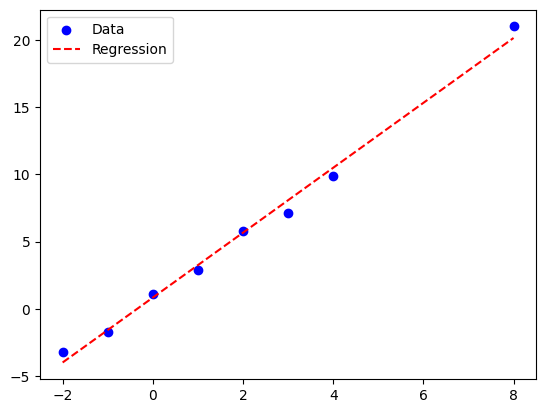

In [22]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, beta0_hat + beta1_hat * x, '--r', label='Regression')
plt.legend()
plt.show()

## Step 2. Bootstrap resampling

Algorithm:
1. Resample the pairs $(x,y)$ with replacement.
2. Refit regression, store slope $\hat\beta_1^*$.
3. Repeat $B=2000$ times.

Obtain bootstrap distribution of slopes.

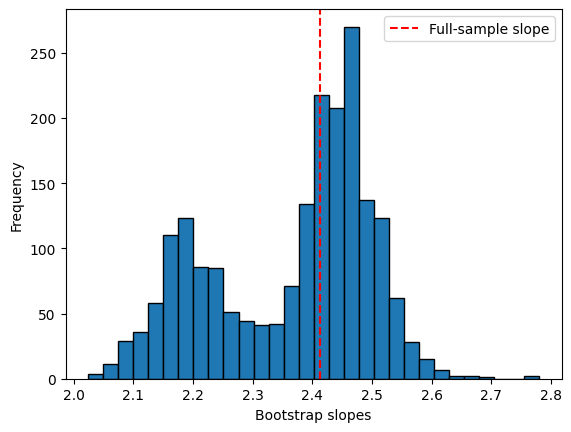

Bootstrap mean slope = 2.3660294802769677
Bootstrap std (SE) = 0.13371261443675952


In [23]:
B = 2000
rng = np.random.default_rng(0)
betas1_star = []

for b in range(B):
    # TODO: resample indices with replacement
    idx = rng.integers(0, n, n)
    xb, yb = x[idx], y[idx]
    
    # TODO: compute slope for bootstrap sample
    xb_bar = np.mean(xb)
    yb_bar = np.mean(yb)
    beta1_star = np.sum((xb - xb_bar) * (yb - yb_bar)) / np.sum((xb - xb_bar)**2)
    betas1_star.append(beta1_star)

betas1_star = np.array(betas1_star)

plt.hist(betas1_star, bins=30, edgecolor='k')
plt.axvline(beta1_hat, color='r', linestyle='--', label='Full-sample slope')
plt.xlabel("Bootstrap slopes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Bootstrap mean slope =", betas1_star.mean())
print("Bootstrap std (SE) =", betas1_star.std(ddof=1))

## Step 3. Confidence intervals

- Normal-approximation CI: $\hat\beta_1 \pm z_{0.975}\cdot SE_{boot}$
- Percentile CI: empirical quantiles of bootstrap distribution

In [24]:
from scipy.stats import norm

alpha = 0.05
z = norm.ppf(1 - alpha/2)

# TODO: Normal CI
se_boot = betas1_star.std(ddof=1)
ci_normal = (beta1_hat - z * se_boot , beta1_hat + z * se_boot)

# TODO: Percentile CI
sorted_betas = np.sort(betas1_star)
lower_idx = int((alpha / 2) * B)
upper_idx = int((1 - alpha / 2) * B) - 1
ci_percentile = (sorted_betas[lower_idx], sorted_betas[upper_idx])
    
    
print("Normal-approx CI:", ci_normal)
print("Percentile CI:", ci_percentile)

Normal-approx CI: (np.float64(2.151508338338841), np.float64(2.6756521554883195))
Percentile CI: (np.float64(2.1025641025641026), np.float64(2.555570839064649))


## Step 4. Discussion

- Compare center and width of the two intervals.
- Which one is symmetric? Which adapts to skewness?
- How does the high-leverage point $x=8$ affect the bootstrap distribution?

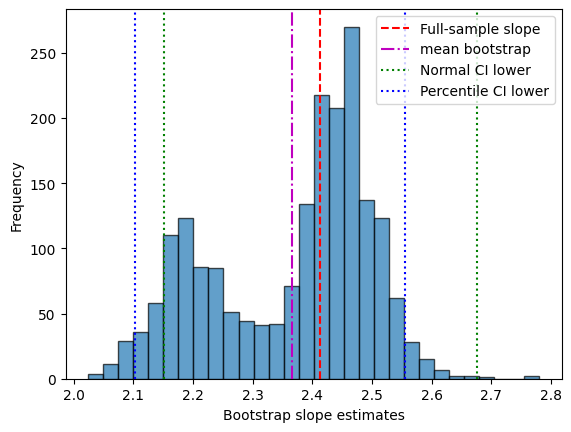

In [ ]:
plt.hist(betas1_star, bins=30, edgecolor='k', alpha=0.7)

mean_boot = betas1_star.mean()

plt.axvline(beta1_hat, color='r', linestyle='--', label='Full-sample slope')
plt.axvline(mean_boot, color='m', linestyle='-.', label='mean bootstrap')
plt.axvline(ci_normal[0], color='g', linestyle=':', label='Normal CI lower')
plt.axvline(ci_normal[1], color='g', linestyle=':')
plt.axvline(ci_percentile[0], color='b', linestyle=':', label='Percentile CI lower')
plt.axvline(ci_percentile[1], color='b', linestyle=':')

plt.xlabel("Bootstrap slope estimates")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The **normal confidence** interval is centered on the point estimate beta1_hat, and it is symmetric.

The percentile confidence interval is based on the quantiles of the bootstrap distribution. Its "center" is not necessarily beta1_hat if the bootstrap distribution is biased relative to beta1_hat, the percentile CI will be shifted accordingly.

As sean in the course we can argue that, the normal CI is always **symmetric** around beta1_hat because it assumes a Gaussian approximation.

The percentile CI adapts to the asymmetry of the bootstrap distribution. Its bounds follow the empirical shape, so it can be asymmetric.

After rerunning the previous code and the bootstrap without the point x = 8, we observed that the percentile and normal CIs almost overlap. Moreover, the value x = 8 pulls the bootstrap distribution toward larger slope values, meaning this point has strong leverage. However, the resulting slope estimates are not very different:
```
beta0_hat = 0.9285714285714284
beta1_hat = 2.2
```

Here is the Bootstrap slope estimates **without x=8**


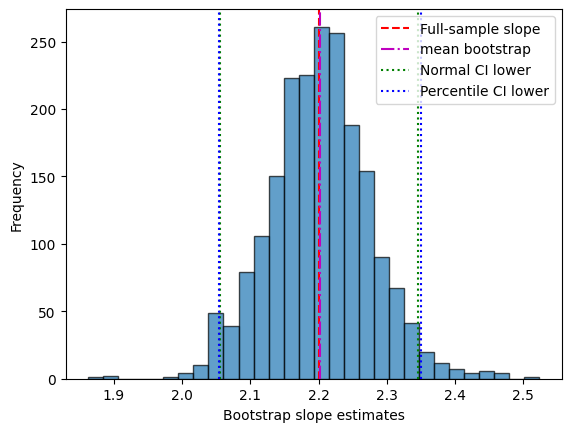